<h1>Анализ данных PornHub</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>One-Hot-Encoding категорий видео</h2>

In [2]:
df = pd.read_csv('data.csv')

total_size = len(df)
df.head()

,Unnamed: 0,img_source,length,nb_views,quality,title,video_link,voting,categories,tags
0,0,http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...,1583.0,127450.0,LOW,Tease then suck,http://thumbzilla.com/video/244ff4e3d92c3bc943...,84.0,Blowjob,blowjob__oral __fullvideo__strip__tease
1,1,http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...,2501.0,480620.0,LOW,Two hot chick on one dick,http://thumbzilla.com/video/1f6206a9c0ea20f710...,79.0,Threesome,oral__blonde__threesome__blowjob__kissing__tig...
2,2,http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...,1513.0,99720.0,LOW,Chick stretches her pussy and blows for the cam,http://thumbzilla.com/video/384a338ea9e067abe2...,77.0,Brunette,blowjob__pussy__fingering__oral __fullvideo__s...
3,3,http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...,1710.0,598820.0,LOW,Fucking my neighbour,http://thumbzilla.com/video/7d7f0f159d8550a233...,80.0,Blonde__MILF,rubbing__oral__blonde__busty__blowjob__hardcor...
4,4,http://cdn-d-img.pornhub.com/m=eafT8daaaa/vide...,1694.0,155850.0,LOW,Small titted whore sucking a cock for lunch,http://thumbzilla.com/video/cd325329c5da836d29...,79.0,POV,rubbing__oral__blowjob__fingering__masturbatio...


In [3]:
del df['Unnamed: 0']
del df['img_source'] 
del df['video_link']
del df['tags']
df.head()

,length,nb_views,quality,title,voting,categories
0,1583.0,127450.0,LOW,Tease then suck,84.0,Blowjob
1,2501.0,480620.0,LOW,Two hot chick on one dick,79.0,Threesome
2,1513.0,99720.0,LOW,Chick stretches her pussy and blows for the cam,77.0,Brunette
3,1710.0,598820.0,LOW,Fucking my neighbour,80.0,Blonde__MILF
4,1694.0,155850.0,LOW,Small titted whore sucking a cock for lunch,79.0,POV


In [4]:
categories = list()

for category in df['categories'].values:
    category = str(category)
    for tag in category.split('__'):
        if not tag in categories:
            categories.append(tag)
    
categories[:5]

['Blowjob', 'Threesome ', 'Brunette', 'Blonde', 'MILF ']

In [5]:
for tag in categories:
    df[tag] = np.zeros(total_size)

df.head()

,length,nb_views,quality,title,voting,categories,Blowjob,Threesome,Brunette,Blonde,...,Cuckold,Bukkake,Shemale,Bisexual,Virtual Reality,Feet,Hentai,Described Video,Described Video,60fps
0,1583.0,127450.0,LOW,Tease then suck,84.0,Blowjob,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2501.0,480620.0,LOW,Two hot chick on one dick,79.0,Threesome,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1513.0,99720.0,LOW,Chick stretches her pussy and blows for the cam,77.0,Brunette,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1710.0,598820.0,LOW,Fucking my neighbour,80.0,Blonde__MILF,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1694.0,155850.0,LOW,Small titted whore sucking a cock for lunch,79.0,POV,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
for tag in categories:
    column = np.zeros(total_size)
    for i, category in enumerate(df[categories]):
        if tag in category.split('__'):
            column[i] = 1
    df[tag] = column
    
df.head()    

,length,nb_views,quality,title,voting,categories,Blowjob,Threesome,Brunette,Blonde,...,Cuckold,Bukkake,Shemale,Bisexual,Virtual Reality,Feet,Hentai,Described Video,Described Video,60fps
0,1583.0,127450.0,LOW,Tease then suck,84.0,Blowjob,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2501.0,480620.0,LOW,Two hot chick on one dick,79.0,Threesome,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1513.0,99720.0,LOW,Chick stretches her pussy and blows for the cam,77.0,Brunette,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1710.0,598820.0,LOW,Fucking my neighbour,80.0,Blonde__MILF,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1694.0,155850.0,LOW,Small titted whore sucking a cock for lunch,79.0,POV,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Лучшие оценки среди категорий </h2>

In [7]:
votes = [(tag, df[df[tag] == 1]['voting'].values.mean()) for tag in categories]
votes[:5]

[('Blowjob', 84.0),
 ('Threesome ', 79.0),
 ('Brunette', 77.0),
 ('Blonde', 80.0),
 ('MILF ', 79.0)]

In [8]:
votes.sort(reverse=True, key=lambda set: set[1])
votes = votes[:15]; votes.reverse()
votes[:5]

[('Japanese', 87.0),
 ('Creampie', 87.0),
 ('Euro', 87.0),
 ('Italian', 88.0),
 ('Anal ', 88.0)]

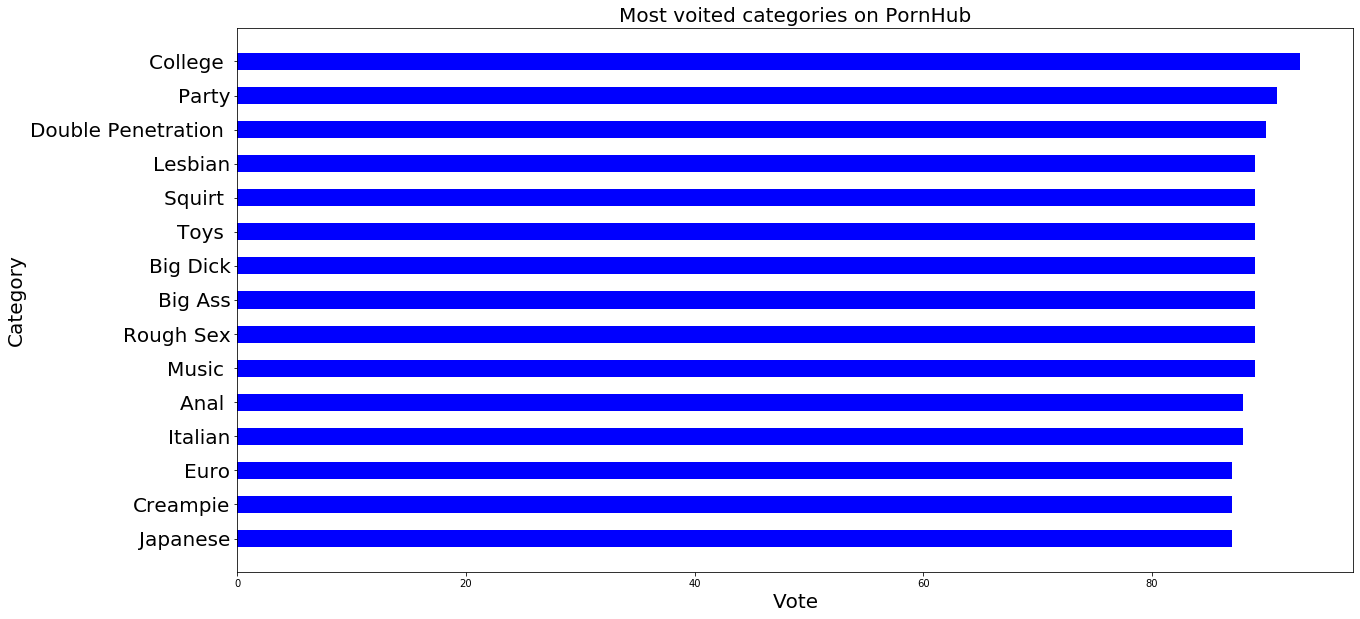

In [9]:
scores = [set[1] for set in votes]
labels = [set[0] for set in votes]

plt.figure(figsize=(20, 10))
plt.yticks(range(15), labels, fontsize=20)
plt.title('Most voited categories on PornHub', fontsize=20)
plt.xlabel('Vote', fontsize=20); plt.ylabel('Category', fontsize=20)
plt.barh(range(15), scores, height=0.5, color='blue')

plt.savefig('votes.png')

<h2>Самые просматриваемые категории</h2>

In [10]:
views = [(tag, df[df[tag] == 1]['nb_views'].values.mean()) for tag in categories]
views[:5]

[('Blowjob', 127450.0),
 ('Threesome ', 480620.0),
 ('Brunette', 99720.0),
 ('Blonde', 598820.0),
 ('MILF ', 155850.0)]

In [11]:
views.sort(reverse=True, key=lambda set: set[1])
views = views[:15]; views.reverse()
views[:5]

[('Interracial ', 897420.0),
 ('Fisting', 1210000.0),
 ('Behind The Scenes ', 1270000.0),
 ('Babe ', 1360000.0),
 ('Cuckold ', 1450000.0)]

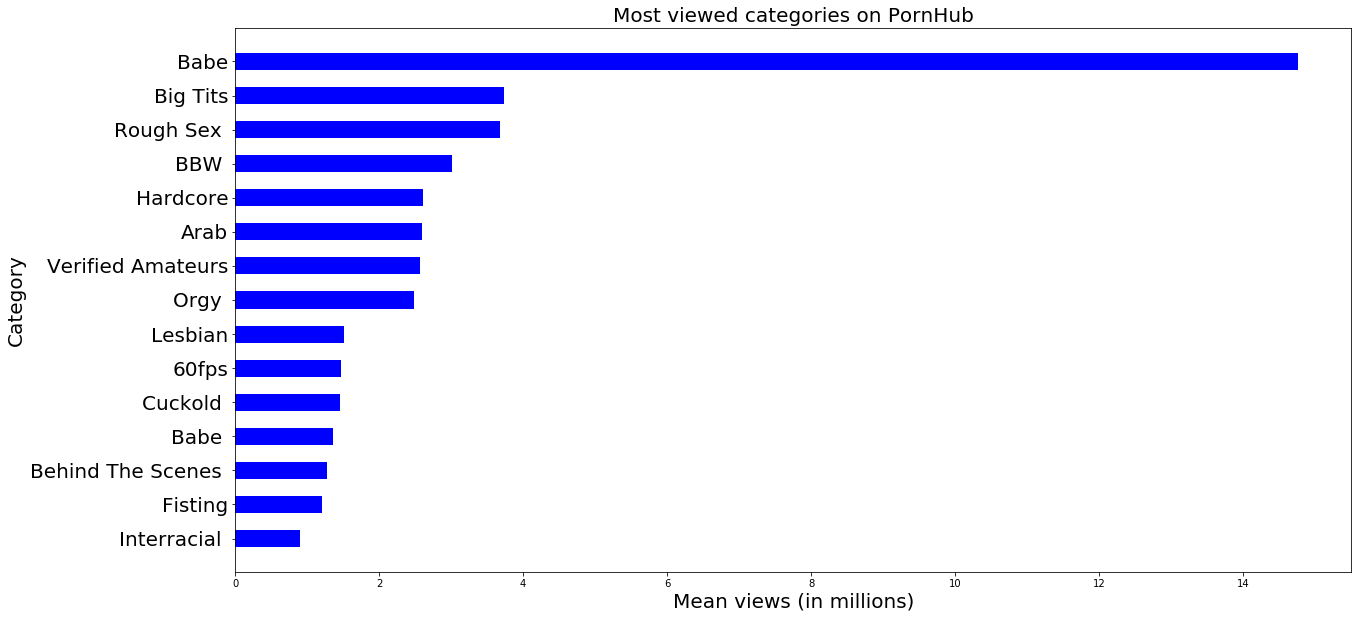

In [12]:
view = [set[1] / 10**6 for set in views]
labels = [set[0] for set in views]

plt.figure(figsize=(20, 10))
plt.yticks(range(15), labels, fontsize=20)
plt.title('Most viewed categories on PornHub', fontsize=20)
plt.xlabel('Mean views (in millions)', fontsize=20); plt.ylabel('Category', fontsize=20)
plt.barh(range(15), view, height=0.5, color='blue')

plt.savefig('views.png')

<h2> Самые длинные ролики</h2>

In [13]:
lengths = [(tag, df[df[tag] == 1]['length'].values.mean()) for tag in categories]
lengths[:5]

[('Blowjob', 1583.0),
 ('Threesome ', 2501.0),
 ('Brunette', 1513.0),
 ('Blonde', 1710.0),
 ('MILF ', 1694.0)]

In [14]:
lengths.sort(reverse=True, key=lambda set: set[1])
lengths = lengths[:15]; lengths.reverse()
lengths[:5]

[('Fisting', 1732.0),
 ('Hardcore', 1793.0),
 ('60fps', 1803.0),
 ('Small Tits ', 1821.0),
 ('Parody', 1843.0)]

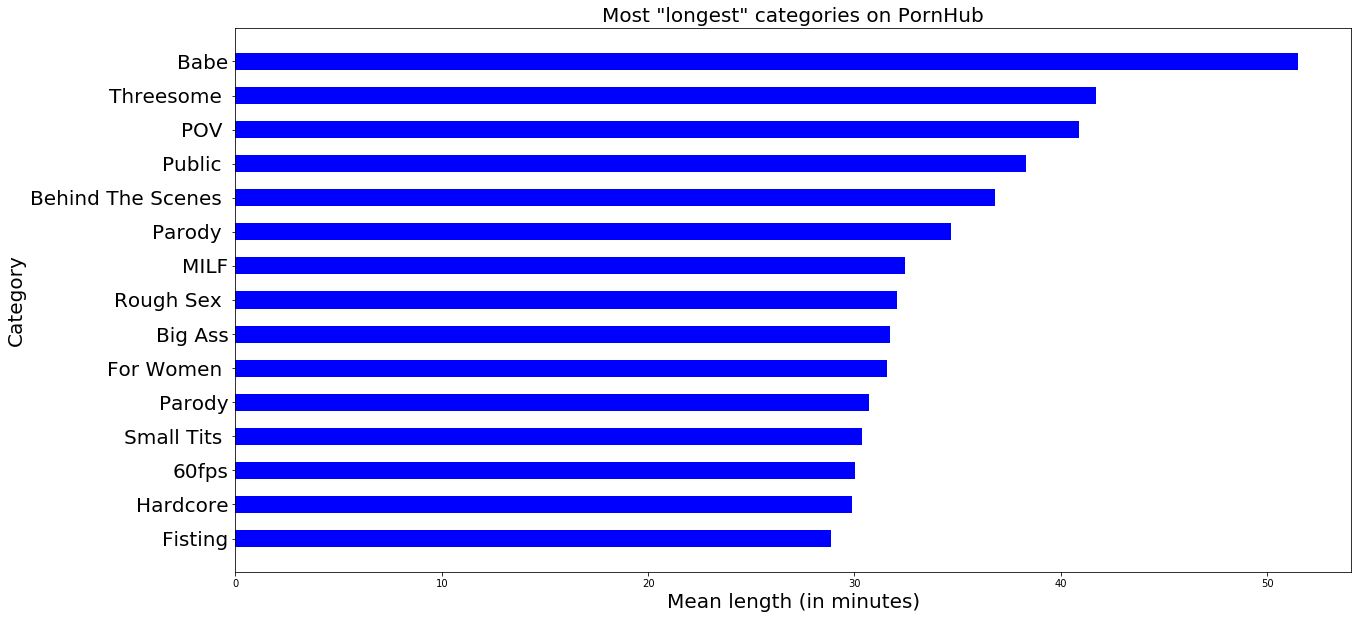

In [19]:
length = [set[1] / 60 for set in lengths]
labels = [set[0] for set in lengths]

plt.figure(figsize=(20, 10))
plt.yticks(range(15), labels, fontsize=20)
plt.title('Most "longest" categories on PornHub', fontsize=20)
plt.xlabel('Mean length (in minutes)', fontsize=20); plt.ylabel('Category', fontsize=20)
plt.barh(range(15), length, height=0.5, color='blue')

plt.savefig('lengths.png')